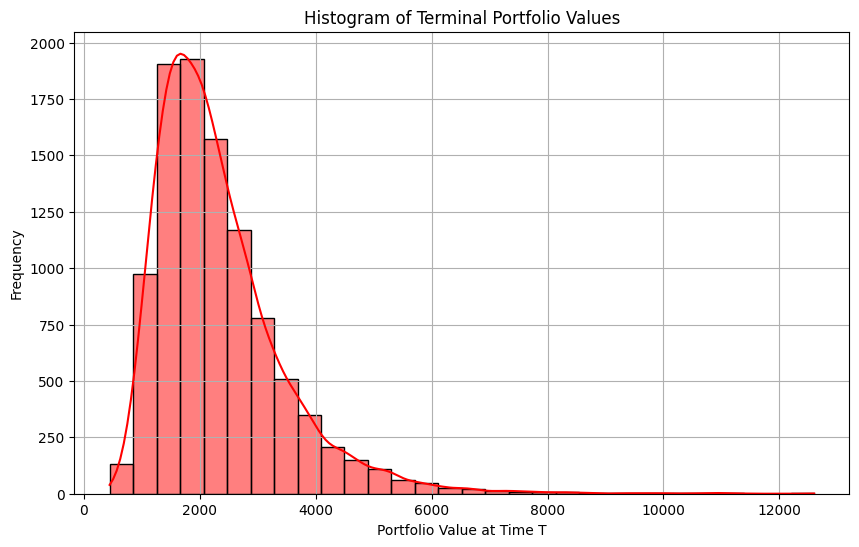

Percentiles of Terminal Portfolio Values:
0.0% Percentile: 448.73873532578375
0.5% Percentile: 725.4867791321357
1.0% Percentile: 824.6937713724761
1.5% Percentile: 871.6857431620326
2.0% Percentile: 910.6712196490001
2.5% Percentile: 944.1228417756614
3.0% Percentile: 978.145598309745
3.5% Percentile: 1003.3214927874002
4.0% Percentile: 1023.4207423689725
4.5% Percentile: 1044.691150944618
5.0% Percentile: 1067.7627674717228
5.5% Percentile: 1093.6687672116457
6.0% Percentile: 1111.5046397195351
6.5% Percentile: 1127.6375081536062
7.0% Percentile: 1143.4807008720911
7.5% Percentile: 1157.7986980614246
8.0% Percentile: 1172.680119623844
8.5% Percentile: 1185.8088409813265
9.0% Percentile: 1201.2131453550176
9.5% Percentile: 1212.376250611701
10.0% Percentile: 1225.9786471993327
10.5% Percentile: 1238.806724010855
11.0% Percentile: 1255.8735528487593
11.5% Percentile: 1270.287093096629
12.0% Percentile: 1279.7450614032177
12.5% Percentile: 1292.2751544136988
13.0% Percentile: 1303.17972

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of assets, time steps, and simulations
num_assets = 12
num_years = 7
num_time_steps = 252 * num_years  # Number of trading days over 7 years
num_simulations = 10000

# Define the initial prices of the assets
initial_prices = np.full(num_assets, 100.0)  # 12 assets, each starting at 100

# Define the expected returns (annualized) and volatilities (annualized) for each asset
expected_returns = np.random.uniform(0.08, 0.12, num_assets)  # Random returns between 4% and 8%
volatilities = np.random.uniform(0.08, 0.30, num_assets)  # Random volatilities between 8% and 20%

# Define the correlation matrix with off-diagonal elements specified
correlation_matrix = np.ones((num_assets, num_assets)) * 0.65  # Example: 0.65 correlation between all assets
np.fill_diagonal(correlation_matrix, 1.0)  # Diagonal elements are 1

# Convert correlation matrix to covariance matrix
covariance_matrix = np.outer(volatilities, volatilities) * correlation_matrix

# Define the risk-free rate and time period
risk_free_rate = 0.035  # 3.5% annual risk-free rate
dt = 1 / 252  # Daily time steps

# Define parameters for jump process
jump_frequency = 1  # Average number of jumps per year
jump_mean = 0.1  # Mean jump size
jump_std = 0.5  # Standard deviation of jump size

# Function to simulate portfolio values
def simulate_portfolio():
    # Generate correlated random returns using Cholesky decomposition
    L = np.linalg.cholesky(covariance_matrix)
    random_returns = np.random.normal(size=(num_time_steps, num_assets))
    correlated_returns = random_returns @ L.T

    # Adjust for drift and volatility to get daily returns
    drift = (expected_returns - 0.5 * volatilities**2) * dt
    diffusion = correlated_returns * np.sqrt(dt)

    # Initialize arrays for jump components
    jump_times = np.arange(0, num_years, dt)
    jump_sizes = np.random.normal(jump_mean, jump_std, size=len(jump_times))
   
    
    # Initialize asset prices
    asset_prices = np.zeros((num_time_steps + 1, num_assets))
    asset_prices[0] = initial_prices

    # Simulate asset prices
    for t in range(1, num_time_steps + 1):
        # Check for jump events
        if np.random.poisson(jump_frequency * dt) > 0:
            jump_idx = np.random.randint(len(jump_times))
            jump_asset = np.random.randint(num_assets)
            asset_prices[t][jump_asset] += jump_sizes[jump_idx]

        asset_prices[t] = asset_prices[t-1] * np.exp(drift + diffusion[t-1])

    # Calculate the portfolio value over time
    portfolio_value = asset_prices.sum(axis=1)

    # Extract the terminal value of the portfolio
    terminal_value = portfolio_value[-1]

    return asset_prices, portfolio_value, terminal_value

# Run the simulation 10000 times
simulated_portfolios = []
terminal_values = []

for _ in range(num_simulations):
    asset_prices, portfolio_value, terminal_value = simulate_portfolio()
    simulated_portfolios.append(asset_prices)
    terminal_values.append(terminal_value)


# Plot the histogram of the terminal portfolio values with overlay smooth distribution
plt.figure(figsize=(10, 6))
sns.histplot(terminal_values, bins=30, kde=True, color='red')
plt.title('Histogram of Terminal Portfolio Values')
plt.xlabel('Portfolio Value at Time T')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate and display percentiles of terminal portfolio values
percentiles = np.arange(0, 100.5, 0.5)
percentile_values = np.percentile(terminal_values, percentiles)

print("Percentiles of Terminal Portfolio Values:")
for p, val in zip(percentiles, percentile_values):
    print(f"{p}% Percentile: {val}")


In [14]:
# Calculate summary statistics of terminal portfolio values
mean_terminal_value = np.mean(terminal_values)
std_terminal_value = np.std(terminal_values)
percentiles = np.percentile(terminal_values, [1, 10, 50, 99])

print("Summary Statistics of Terminal Portfolio Values:")
print(f"Mean: {mean_terminal_value}")
print(f"Standard Deviation: {std_terminal_value}")
print(f"1st Percentile: {percentiles[0]}")
print(f"10th Percentile: {percentiles[1]}")
print(f"Median: {percentiles[2]}")
print(f"99th Percentile: {percentiles[3]}")

Summary Statistics of Terminal Portfolio Values:
Mean: 2352.3065871527515
Standard Deviation: 880.0234334110016
1st Percentile: 1000.3787834340053
10th Percentile: 1416.5896262848667
Median: 2197.369994139475
99th Percentile: 5190.984515166084


In [15]:
# Specify the desired percentile
desired_percentile = 0

# Find the simulation closest to the desired percentile
closest_index = np.argmin(np.abs(terminal_values - np.percentile(terminal_values, desired_percentile)))

# Print the terminal value of the portfolio and the underlying asset values for the closest simulation
print("\nTerminal Value of the Portfolio:")
print(terminal_values[closest_index])
print("\nUnderlying Asset Values:")
print(simulated_portfolios[closest_index][-1])


Terminal Value of the Portfolio:
687.4668459021317

Underlying Asset Values:
[14.25985154 21.09161366 57.32047764 48.496594   98.83053917 95.21336683
 20.11216544 69.23145852 87.15064961  8.04572645 75.55979027 92.15461277]


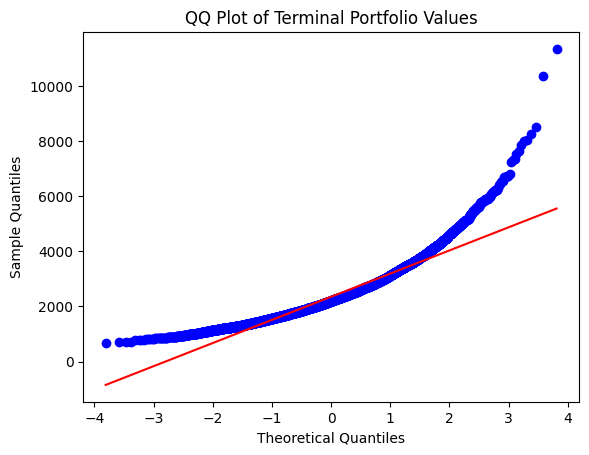


Worst 10 Terminal Asset Values:
Simulation 8705: 687.4668459021317
Simulation 3283: 704.509059516373
Simulation 2546: 712.3341718690058
Simulation 5905: 716.0034150936096
Simulation 1783: 775.1398300567846
Simulation 9107: 785.1761541673952
Simulation 6422: 790.9898179781392
Simulation 1115: 792.419353677441
Simulation 986: 804.0406562549864
Simulation 3035: 819.6366868202844


In [16]:
# QQ plot
stats.probplot(terminal_values, dist="norm", plot=plt)
plt.title('QQ Plot of Terminal Portfolio Values')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Print the worst 10 terminal asset values simulated paths
worst_terminal_values_indices = np.argsort(terminal_values)[:10]
print("\nWorst 10 Terminal Asset Values:")
for idx in worst_terminal_values_indices:
    print(f"Simulation {idx+1}: {terminal_values[idx]}")